<a href="https://colab.research.google.com/github/chewon03/origin/blob/main/FE_%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%89%E1%85%B3%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FE_연습

저는 가능하면 실제 데이터셋갖고 연습해야한다고 생각합니다</br>
그래서 오늘 연습할 데이터셋은 실제 캐글 경진대회에서 사용되었던 데이터셋입니다</br>
자세한 내용은 아래 링크에서 확인할 수 있습니다</br>
https://www.kaggle.com/c/home-credit-default-risk</br>

이 대회는 쉽게 말해</br>
'각 고객의 정보를 줄테니 대출 상환 여부를 예측해봐' 입니다</br>
오늘은 전처리까지만 해보겠습니다.


In [ ]:
#사용될 라이브러리들을 import합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#경고 문구 무시
import warnings
warnings.filterwarnings('ignore')

#matplotlib 스타일 정의
plt.style.use('fivethirtyeight')

In [ ]:
#bureau.csv 파일을 import합니다.
bureau = pd.read_csv('./bureau.csv')
bureau.head()

#Credit Bureau: 개인신용평가기관 -> bureau.csv: Credit Bureau(CB)에 기록된 타 금융 기관에서 제공받은 모든 고객의 이전 신용 거래

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


# 1. Imputing

우선 Null값 비중부터 확인해보죠

In [ ]:
bureau.isna().sum()/len(bureau)*100

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64

Null값 비중이 70% 수준인 피처 2개는 없애야겠고</br>
남은 4개중 10%이상인 3개는 따로 피처를 만들어봐야겠네요</br>
그러고 나면 Imputing방법까지 생각해봅시다

In [ ]:
bureau.drop(columns=['AMT_CREDIT_MAX_OVERDUE','AMT_ANNUITY'], inplace=True)
columns = ['DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
for c in columns:
    c_null = c+'_NULL'
    bureau[c_null] = 0
    for i in bureau.index:
        if bureau.loc[i,c]==np.nan:
            bureau.loc[i,c_null] = 1

In [ ]:
bureau[['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']].dtypes

DAYS_CREDIT_ENDDATE     float64
DAYS_ENDDATE_FACT       float64
AMT_CREDIT_SUM_DEBT     float64
AMT_CREDIT_SUM_LIMIT    float64
dtype: object

4개의 피처 모두 Numerical하네요</br>
배운대로 Median을 집어넣어보죠</br>

In [ ]:
columns = ['DAYS_CREDIT_ENDDATE','DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
for c in columns:
    bureau[c] = bureau[c].fillna(bureau[c].median())

# 2. Encoding

In [ ]:
bureau.dtypes

SK_ID_CURR                     int64
SK_ID_BUREAU                   int64
CREDIT_ACTIVE                 object
CREDIT_CURRENCY               object
DAYS_CREDIT                    int64
CREDIT_DAY_OVERDUE             int64
DAYS_CREDIT_ENDDATE          float64
DAYS_ENDDATE_FACT            float64
CNT_CREDIT_PROLONG             int64
AMT_CREDIT_SUM               float64
AMT_CREDIT_SUM_DEBT          float64
AMT_CREDIT_SUM_LIMIT         float64
AMT_CREDIT_SUM_OVERDUE       float64
CREDIT_TYPE                   object
DAYS_CREDIT_UPDATE             int64
DAYS_ENDDATE_FACT_NULL         int64
AMT_CREDIT_SUM_DEBT_NULL       int64
AMT_CREDIT_SUM_LIMIT_NULL      int64
dtype: object

Categorical 없애야 하는데 dtype이 object인 걸 보면 됩니다
3개가 있네요

In [ ]:
columns = ['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']
for c in columns:
    print(c,bureau[c].nunique())

CREDIT_ACTIVE 4
CREDIT_CURRENCY 4
CREDIT_TYPE 15


어떻게 인코딩할지 결정하기 위해 직접 한번 살펴보죠

In [ ]:
bureau[['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']]

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,Closed,currency 1,Consumer credit
1,Active,currency 1,Credit card
2,Active,currency 1,Consumer credit
3,Active,currency 1,Credit card
4,Active,currency 1,Consumer credit
...,...,...,...
1716423,Active,currency 1,Microloan
1716424,Closed,currency 1,Consumer credit
1716425,Closed,currency 1,Consumer credit
1716426,Closed,currency 1,Consumer credit


In [ ]:
print(bureau['CREDIT_ACTIVE'].unique())
print(bureau['CREDIT_CURRENCY'].unique())

['Closed' 'Active' 'Sold' 'Bad debt']
['currency 1' 'currency 2' 'currency 4' 'currency 3']


순서있는 4개짜리는 레이블 인코딩 처리하고</br>
순서없는 4개짜리는 원핫 인코딩 처리하고</br>
15개짜리는 개수를 줄여서 원핫 인코딩을 해보면 좋을 것 같습니다.</br>

In [ ]:
from sklearn.preprocessing import LabelEncoder
bureau['CREDIT_CURRENCY'] = LabelEncoder().fit_transform(bureau['CREDIT_CURRENCY'])
bureau['CREDIT_CURRENCY']

0          0
1          0
2          0
3          0
4          0
          ..
1716423    0
1716424    0
1716425    0
1716426    0
1716427    0
Name: CREDIT_CURRENCY, Length: 1716428, dtype: int32

In [ ]:
bureau = pd.get_dummies(bureau,columns=['CREDIT_ACTIVE'])
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_CURRENCY', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'DAYS_ENDDATE_FACT_NULL',
       'AMT_CREDIT_SUM_DEBT_NULL', 'AMT_CREDIT_SUM_LIMIT_NULL',
       'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt',
       'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold'],
      dtype='object')

In [ ]:
bureau.groupby(['CREDIT_TYPE'])['CREDIT_TYPE'].count().sort_values(ascending=False)/len(bureau)*100

CREDIT_TYPE
Consumer credit                                 72.919750
Credit card                                     23.432093
Car loan                                         1.613234
Mortgage                                         1.071469
Microloan                                        0.723188
Loan for business development                    0.115065
Another type of loan                             0.059251
Unknown type of loan                             0.032335
Loan for working capital replenishment           0.027324
Cash loan (non-earmarked)                        0.003263
Real estate loan                                 0.001573
Loan for the purchase of equipment               0.001107
Loan for purchase of shares (margin lending)     0.000233
Interbank credit                                 0.000058
Mobile operator loan                             0.000058
Name: CREDIT_TYPE, dtype: float64

15개중 1%이상인 4개만 원핫인코딩하겠습니다.

In [ ]:
credit_type = ['Consumer credit','Credit card ','Car loan','Mortgage']
for t in credit_type:
    bureau['CREDIT_TYPE'+'_'+t] = np.where(bureau['CREDIT_TYPE']==t,1,0)
bureau['CREDIT_TYPE_Mortgage']

0          0
1          0
2          0
3          0
4          0
          ..
1716423    0
1716424    0
1716425    0
1716426    0
1716427    0
Name: CREDIT_TYPE_Mortgage, Length: 1716428, dtype: int32

In [ ]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,AMT_CREDIT_SUM_DEBT_NULL,AMT_CREDIT_SUM_LIMIT_NULL,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Car loan,CREDIT_TYPE_Mortgage
0,215354,5714462,0,-497,0,-153.0,-153.0,0,91323.00,0.0,...,0,0,0,0,1,0,1,0,0,0
1,215354,5714463,0,-208,0,1075.0,-897.0,0,225000.00,171342.0,...,0,0,1,0,0,0,0,0,0,0
2,215354,5714464,0,-203,0,528.0,-897.0,0,464323.50,0.0,...,0,0,1,0,0,0,1,0,0,0
3,215354,5714465,0,-203,0,-330.0,-897.0,0,90000.00,0.0,...,0,0,1,0,0,0,0,0,0,0
4,215354,5714466,0,-629,0,1197.0,-897.0,0,2700000.00,0.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,0,-44,0,-30.0,-897.0,0,11250.00,11250.0,...,0,0,1,0,0,0,0,0,0,0
1716424,100044,5057754,0,-2648,0,-2433.0,-2493.0,0,38130.84,0.0,...,0,0,0,0,1,0,1,0,0,0
1716425,100044,5057762,0,-1809,0,-1628.0,-970.0,0,15570.00,0.0,...,0,0,0,0,1,0,1,0,0,0
1716426,246829,5057770,0,-1878,0,-1513.0,-1513.0,0,36000.00,0.0,...,0,0,0,0,1,0,1,0,0,0


# 3. Outlier removing

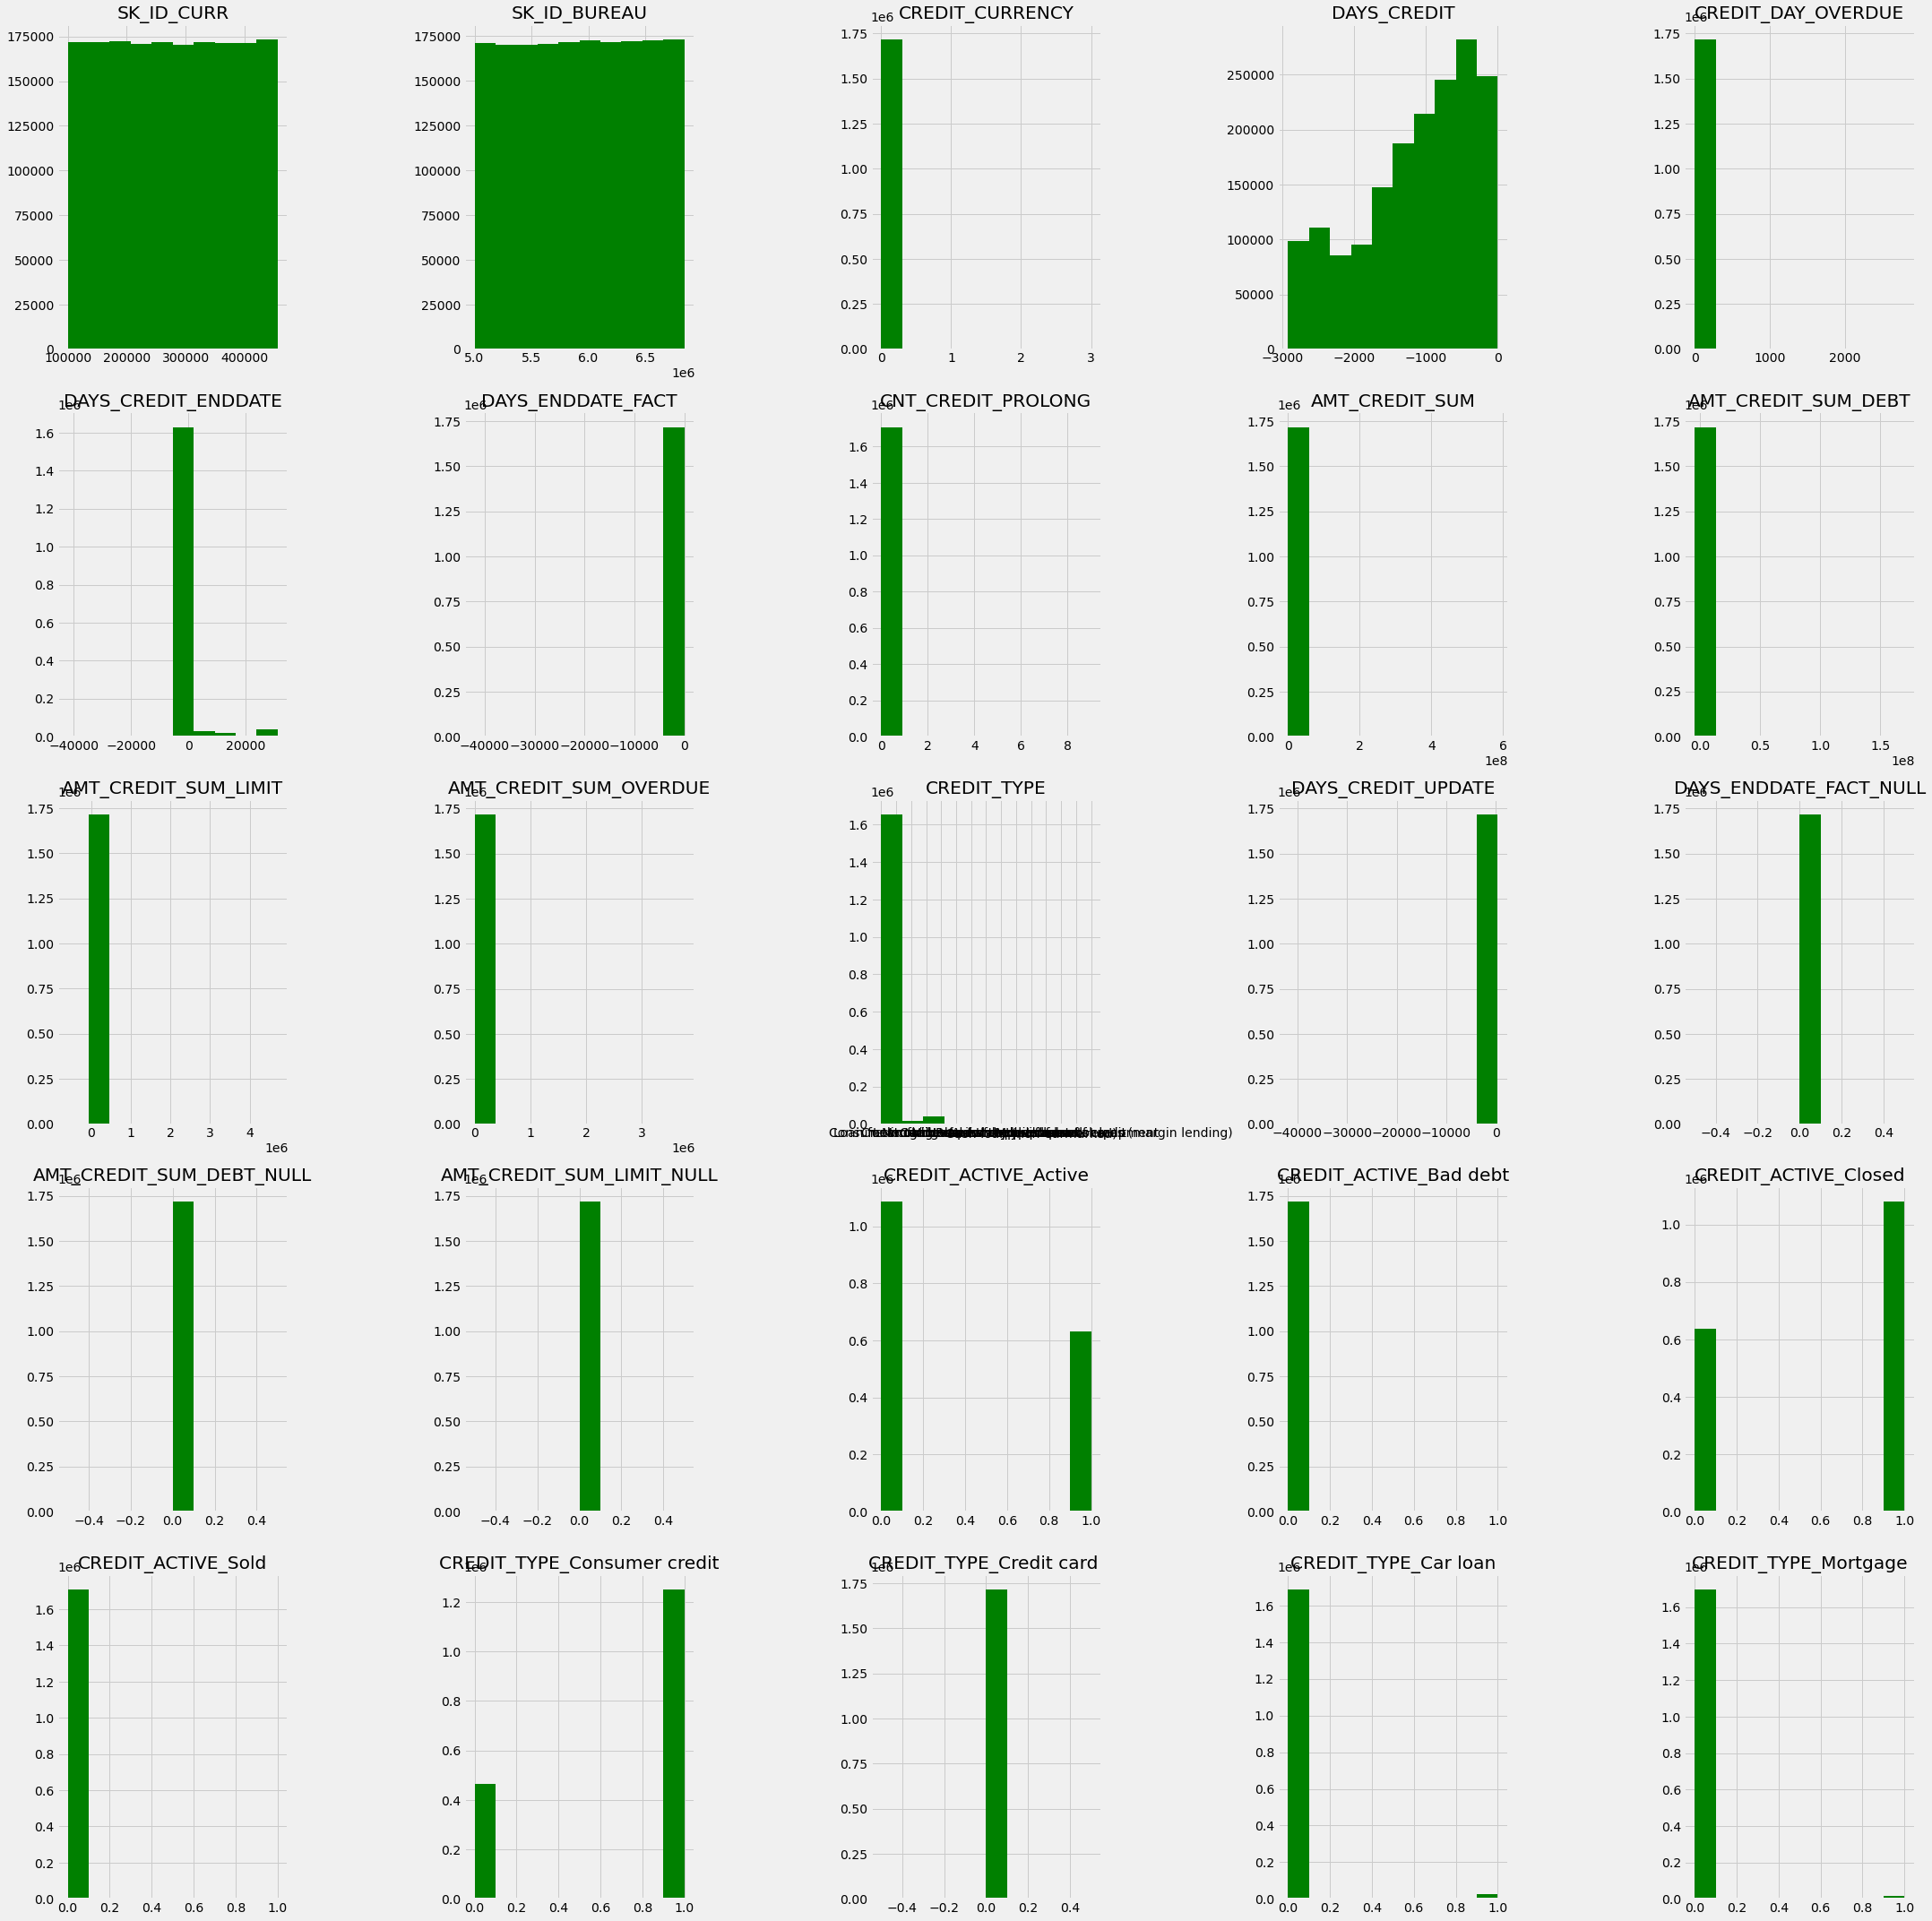

In [ ]:
plt.figure(figsize=(30,30))
for i, col in enumerate(bureau.columns.to_list()):
    plt.subplot(5, 5, i + 1)
    plt.hist(bureau[col], label=col,color='green')
    plt.title(col)
    plt.tight_layout()

<AxesSubplot:ylabel='DAYS_CREDIT'>

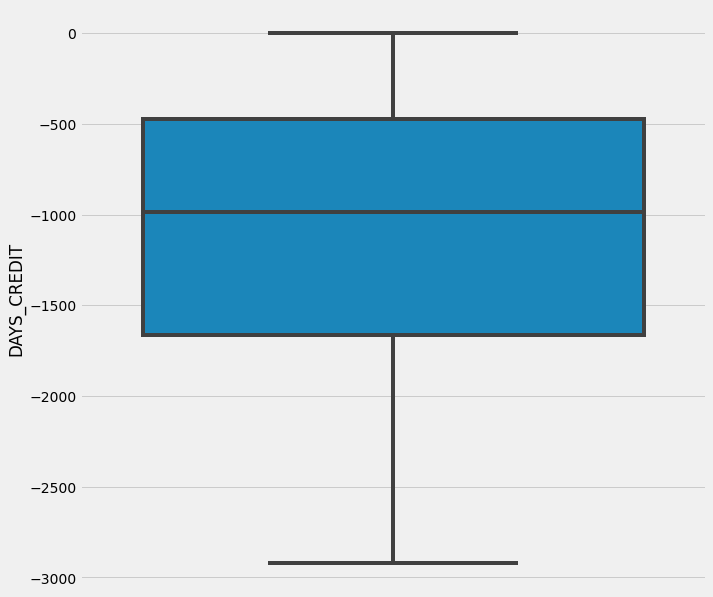

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=bureau, y='DAYS_CREDIT')

다행히 outlier는 없네요

# 4. Correlation removing

<AxesSubplot:>

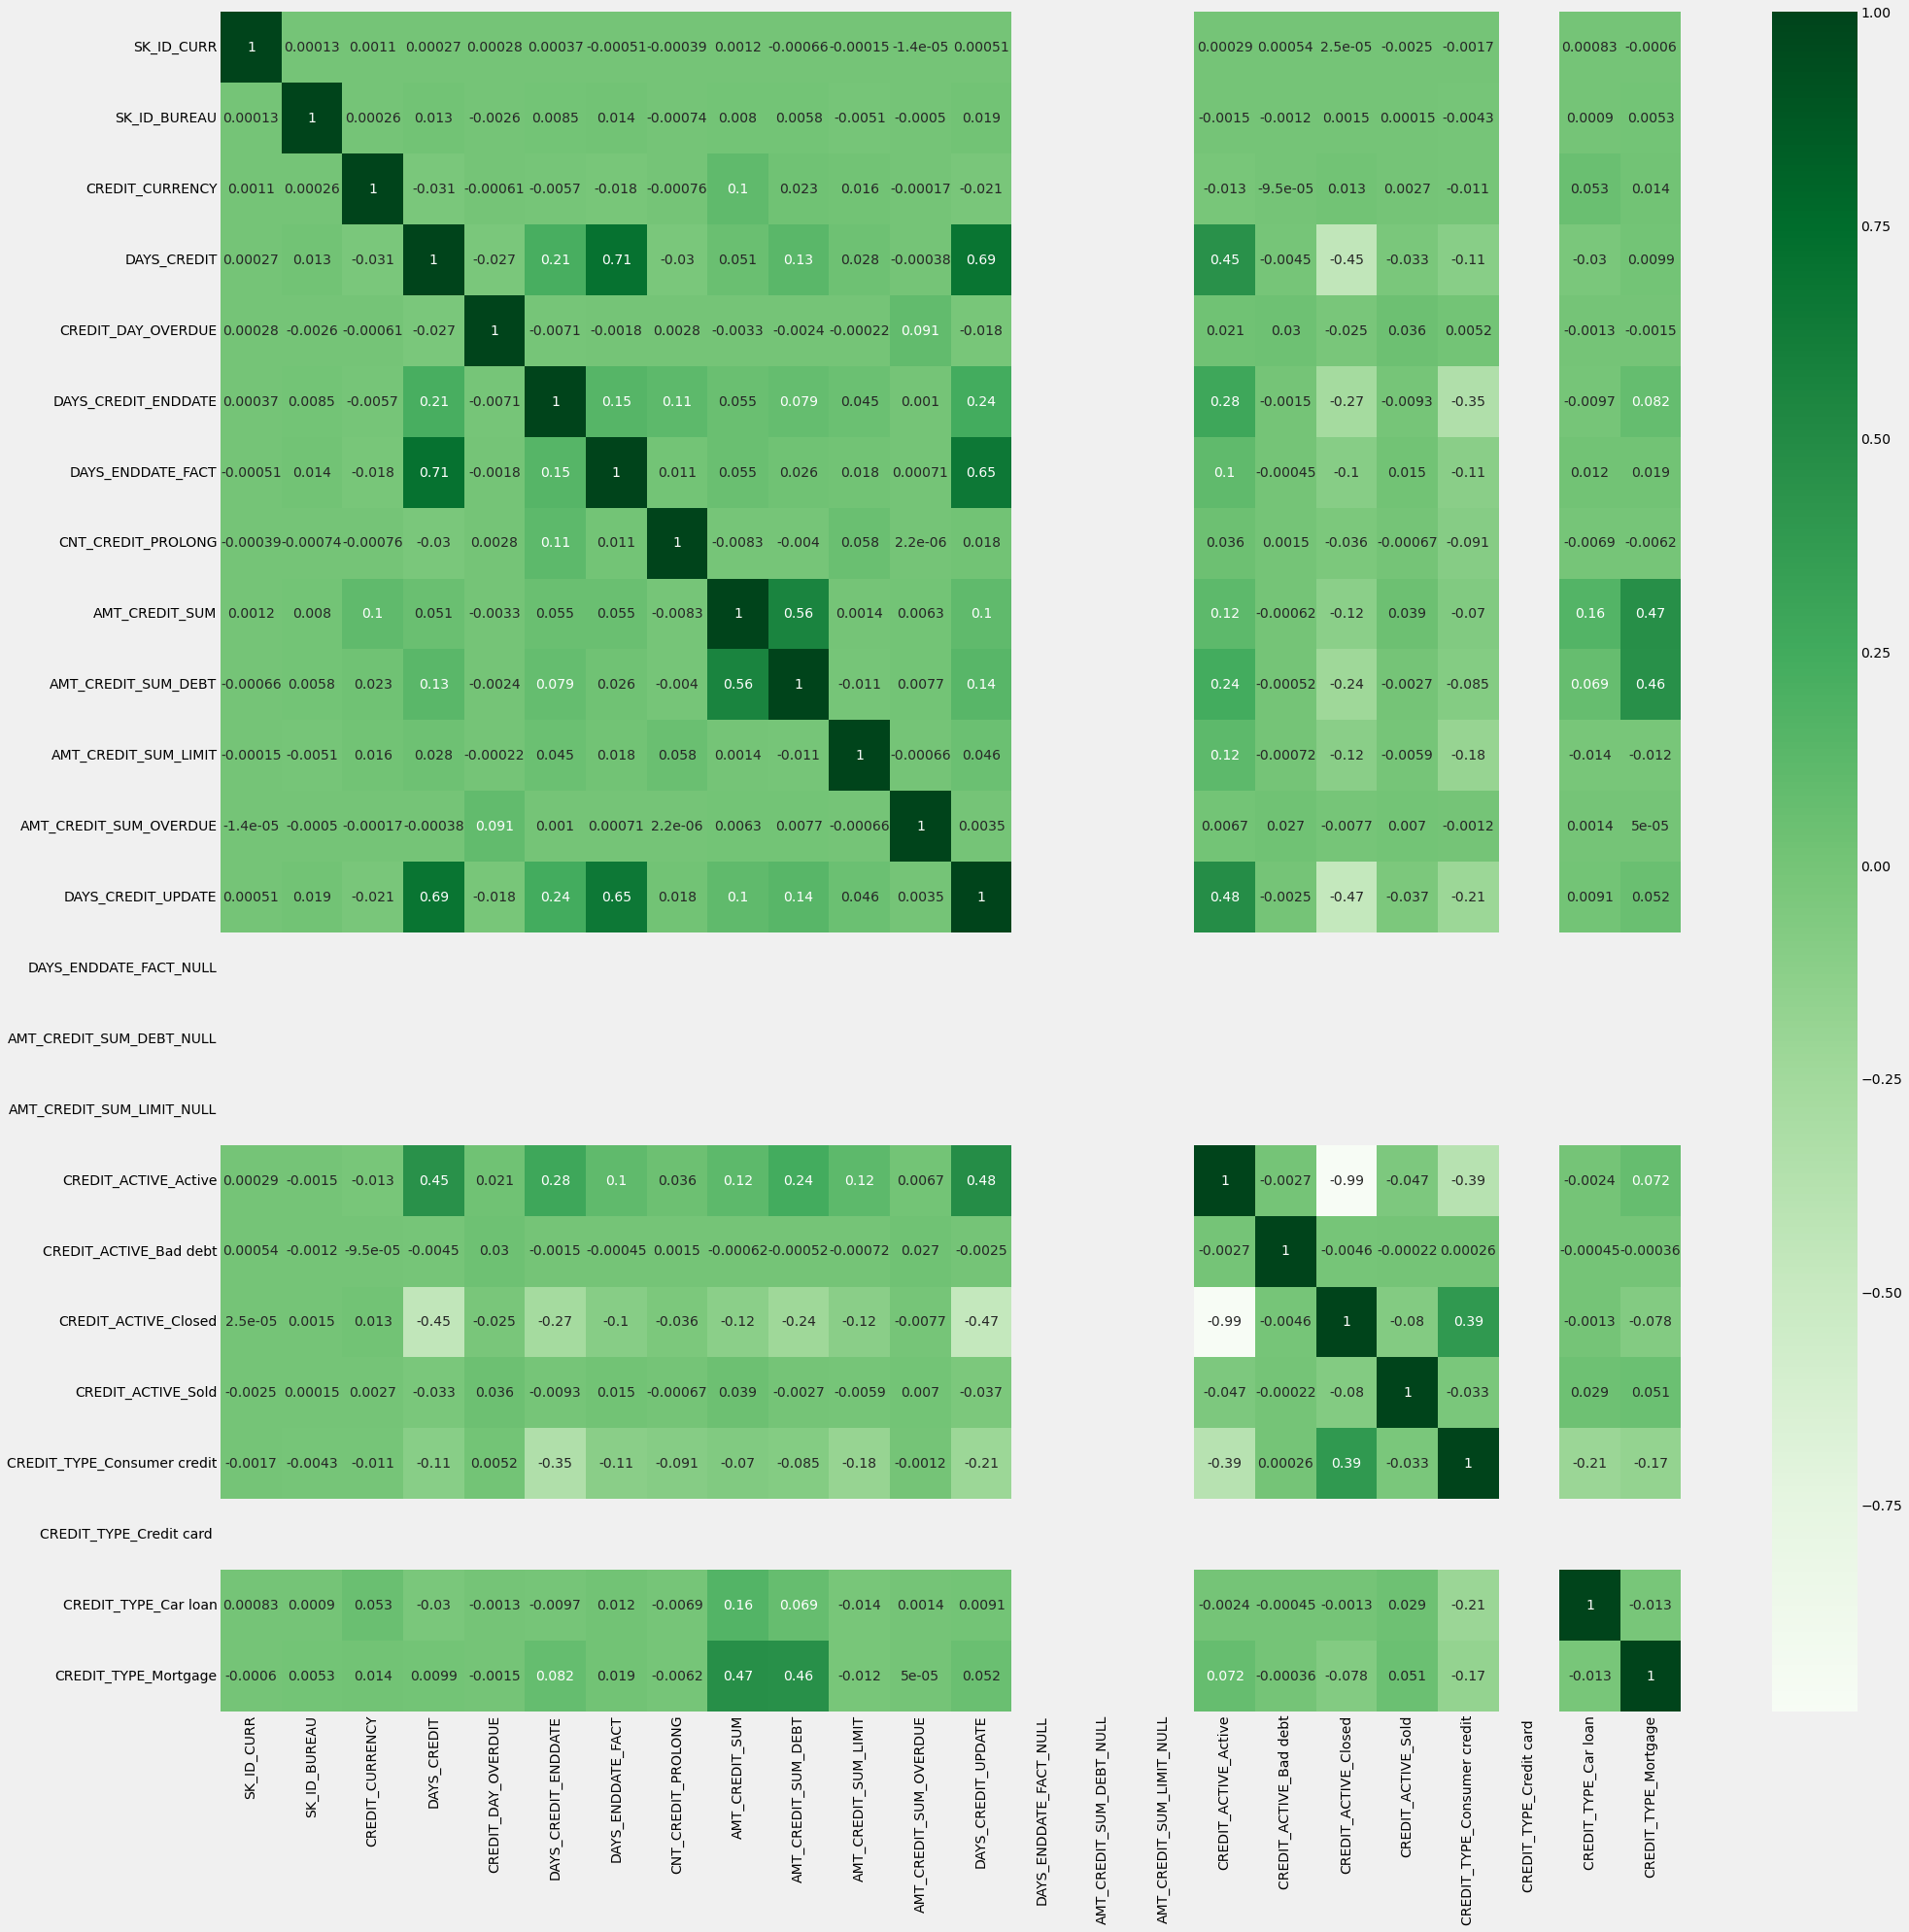

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(bureau.corr(), annot=True, cmap='Greens')

다행히 지나치게 높은 건 없네요</br>
더 하려면 할 수 있지만 불필요할 것 같습니다</br>

In [ ]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,AMT_CREDIT_SUM_DEBT_NULL,AMT_CREDIT_SUM_LIMIT_NULL,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Car loan,CREDIT_TYPE_Mortgage
0,215354,5714462,0,-497,0,-153.0,-153.0,0,91323.00,0.0,...,0,0,0,0,1,0,1,0,0,0
1,215354,5714463,0,-208,0,1075.0,-897.0,0,225000.00,171342.0,...,0,0,1,0,0,0,0,0,0,0
2,215354,5714464,0,-203,0,528.0,-897.0,0,464323.50,0.0,...,0,0,1,0,0,0,1,0,0,0
3,215354,5714465,0,-203,0,-330.0,-897.0,0,90000.00,0.0,...,0,0,1,0,0,0,0,0,0,0
4,215354,5714466,0,-629,0,1197.0,-897.0,0,2700000.00,0.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,0,-44,0,-30.0,-897.0,0,11250.00,11250.0,...,0,0,1,0,0,0,0,0,0,0
1716424,100044,5057754,0,-2648,0,-2433.0,-2493.0,0,38130.84,0.0,...,0,0,0,0,1,0,1,0,0,0
1716425,100044,5057762,0,-1809,0,-1628.0,-970.0,0,15570.00,0.0,...,0,0,0,0,1,0,1,0,0,0
1716426,246829,5057770,0,-1878,0,-1513.0,-1513.0,0,36000.00,0.0,...,0,0,0,0,1,0,1,0,0,0


# 끝!
고생하셨습니다ㅎㅎ